In [2]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    

No GPU was detected. CNNs can be very slow without a GPU.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
%matplotlib inline

In [6]:
# Importieren der Helper Function
!pip install --upgrade deeplearning2020

from deeplearning2020 import helpers

#helpers.plot_images(image, class_labels)

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# Herunterladen des Datensatzes
data, info = tfds.load(
    "imagenette/320px",
    as_supervised=True,
    with_info=True
)

# Größe des Trainingsdatensatzes
dataset_size = info.splits['train'].num_examples

# Größe des Validierungsdatensatzes
dataset_size_val = info.splits['validation'].num_examples


print('dataset size: ', dataset_size)
print('dataset size val: ', dataset_size_val)

# Informationen über die Klassennamen und Anzahl der Klassen
class_names = info.features['label'].names
print('class names: ', class_names)
n_classes = info.features['label'].num_classes
print('number of classes: ', n_classes)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imagenette-train.tfrecord...:   0%|          | 0/12894 [00:00<?, ? examples/s]

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling imagenette-validation.tfrecord...:   0%|          | 0/500 [00:00<?, ? examples/s]

Dataset imagenette downloaded and prepared to C:\Users\jan\tensorflow_datasets\imagenette\320px\0.1.0. Subsequent calls will reuse this data.
dataset size:  12894
dataset size val:  500
class names:  ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']
number of classes:  10


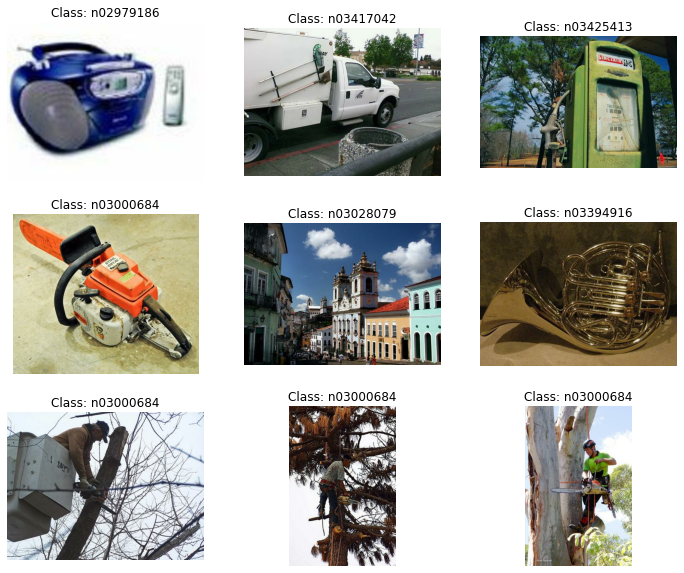

In [9]:
# Anzeigen von 9 Bildern aus dem Trainigsdatensatz
helpers.plot_images(data['train'].take(9), class_names)

In [10]:
def preprocess(image, label):
    resized_image = tf.image.resize(image/255, [300, 300])
    return resized_image, label

In [20]:


train_data = tfds.load(
    'imagenette/320px',
    split=tfds.Split.TRAIN,
    as_supervised=True
)
test_data = tfds.load(
    'imagenette/320px',
    split=tfds.Split.VALIDATION,
    as_supervised=True
)

# Natürlich lassen sich auf die Trainings und Validation Daten auch über die Variable `data` laden
# Dies kann über data['validation'] und data['train'] passieren.
# Um den Code unabhängig von oben nutzen zu können wurde dies hier noch einmal aufgeführt.



In [21]:
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)

shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


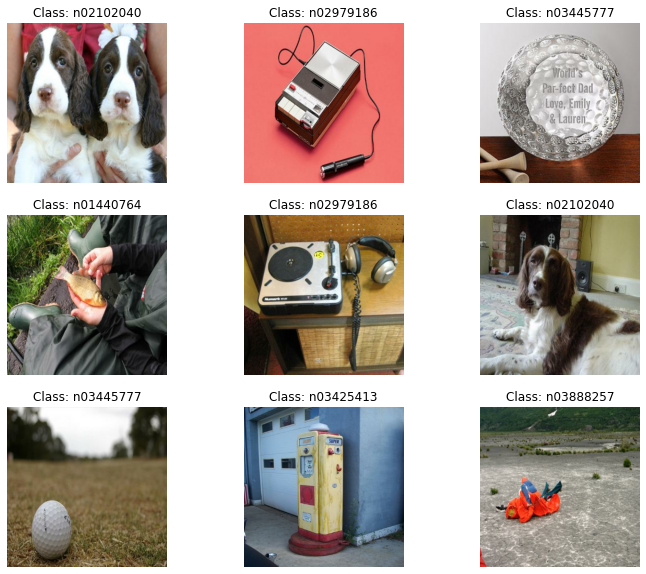

In [22]:
# Anzeigen von 9 Bildern aus dem Trainigsdatensatz
helpers.plot_images(train_data.unbatch().take(9), class_names)

In [23]:
# model
learning_rate=0.001
momentum=0.9
dense_neurons=1000
n_filters=512
first_kernel_size=(7,7)

activation='elu'

# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=256,
    kernel_size=(7,7),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 256, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = n_filters, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)

# Output Layer
output = Dense(n_classes, activation="softmax")(model)

CNN_model = Model(input_layer, output)

# Kompilieren des Modells
optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=momentum)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
CNN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 294, 294, 256)     37888     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 512)       0     

In [ ]:
# Training des Modells mit 12 Epochen
history2 = CNN_model.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)

Epoch 1/12
 43/403 [==>...........................] - ETA: 2:34:29 - loss: 2.2979 - accuracy: 0.1159